#  K-Nearest Neighbors (KNN) on Iris Dataset

In this notebook, we build a classification model using the **Iris dataset** and the **K-Nearest Neighbors (KNN)** algorithm. The dataset contains 3 types of iris plants: *setosa*, *versicolor*, and *virginica*.

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report
)
import joblib

sns.set(style="whitegrid")

##  Load the Iris Dataset

The Iris dataset contains 150 samples with 4 features each. The target is the class of the flower (3 classes).

In [2]:
# Load dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
X.shape[0]

150

##  Train/Validation/Test Split

We split the data into 60% training, 20% validation, and 20% test set using stratified sampling to preserve class distribution.

In [3]:
# Split dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

In [9]:
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 90
Validation set size: 30
Test set size: 30


##  Preprocessing with Standard Scaling

KNN is distance-based, so we standardize the features to have zero mean and unit variance.

In [4]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

##  Train K-Nearest Neighbors Classifier

We use `KNeighborsClassifier` with `n_neighbors=5` (default).

In [5]:
# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

##  Evaluate the Model

We check classification metrics on both validation and test sets.

In [6]:
# Validation set evaluation
y_val_pred = model.predict(X_val_scaled)
print("Validation Results:\n")
print(classification_report(y_val, y_val_pred, target_names=data.target_names))

# Test set evaluation
y_test_pred = model.predict(X_test_scaled)
print("\nTest Results:\n")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

Validation Results:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Test Results:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



##  Confusion Matrix

We visualize how well the model performs using a confusion matrix on the test set.

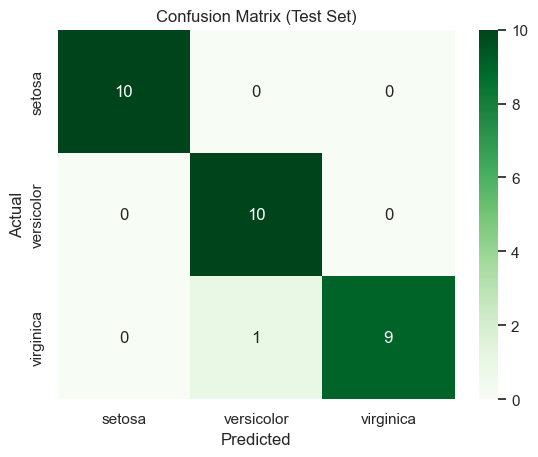

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

In [8]:
# Save the model and scaler
joblib.dump(model, "knn_iris_model.pkl")
joblib.dump(scaler, "knn_scaler.pkl")

['knn_scaler.pkl']